In [1]:
import numpy as np
import pandas as pd
df= pd.read_excel("C:\\Users\\RAM\\Downloads\\innercity.xlsx")
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [2]:
#drop unnecessary columns
#lot_measure + living_measure = total_area (so, we are removing lot and living measure)
df.drop(['dayhours','lot_measure','living_measure','cid','sight','long','lat'], axis=1, inplace=True)

#We have special character '$' in our data, replacing those with NaN
for columns in df.columns:
    df[columns]=df[columns].replace('$',np.nan)
    
#calculating NaN for each column
df.isnull().sum()

price                 0
room_bed            108
room_bath           108
ceil                 72
coast                31
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [3]:
#handling with null values
cat_columns=['room_bed', 'room_bath', 'ceil', 'coast', 'condition', 'quality', 'yr_built', 'furnished']
for i in cat_columns:
    df[i]=df[i].fillna(df[i].mode()[0])
    
num_columns=['ceil_measure','basement','living_measure15','lot_measure15','total_area']
for i in num_columns:
    df[i]=df[i].fillna(df[i].mean())
    
#double checking NaN
df.isnull().any()

price               False
room_bed            False
room_bath           False
ceil                False
coast               False
condition           False
quality             False
ceil_measure        False
basement            False
yr_built            False
yr_renovated        False
zipcode             False
living_measure15    False
lot_measure15       False
furnished           False
total_area          False
dtype: bool

In [4]:
#lot_measure15 and living_measure15 shows the customizations of the house when comparing with total_area
customized=[]
for i in range(len(df)):
    if df['lot_measure15'][i]+df['living_measure15'][i]==df['total_area'][i]:
        customized.append(0)
    else:
        customized.append(1)
df['customized']=pd.DataFrame(customized)

In [5]:
#we got useful info from data so we can remove unnecessary columns
df.drop(['lot_measure15', 'living_measure15'], axis=1, inplace=True)

In [6]:
df['ceil'].unique()

array([1. , 2. , 3. , 1.5, 2.5, 3.5])

In [7]:
df['room_bath'].unique()

array([1.75, 1.  , 2.75, 2.5 , 1.5 , 3.5 , 2.  , 2.25, 3.  , 4.  , 3.25,
       3.75, 5.  , 0.75, 5.5 , 4.25, 4.5 , 4.75, 8.  , 6.75, 5.25, 6.  ,
       0.  , 1.25, 5.75, 7.5 , 6.5 , 0.5 , 7.75, 6.25])

In [8]:
#some categorical coulmns are not perfect (its not possible to have rooms or floors in float like 1.5 or 2.75)
#so making perfect categories
df['ceil']=df['ceil'].apply(np.ceil)
df['room_bath']=df['room_bath'].apply(np.ceil)

Text(0, 0.5, 'count')

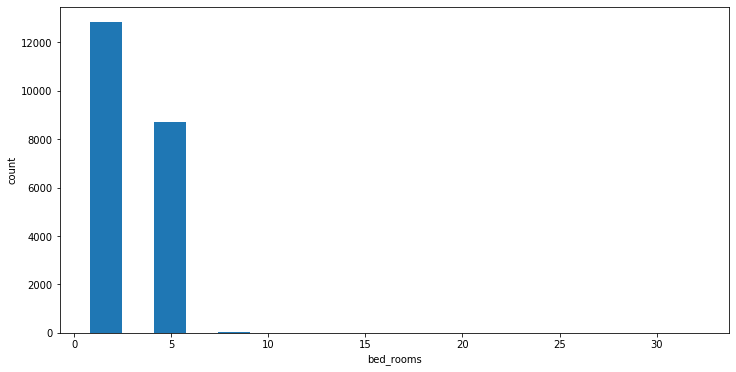

In [9]:
#finding outliers
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,6)
plt.hist(df.room_bed,rwidth=0.5)
plt.xlabel('bed_rooms')
plt.ylabel('count')

In [10]:
#as per above graphs more than 5 bedrooms are less in number so considering those are outliers.
#houses with more than 5 bed room is unusual. So, considering those as outliers and removing
df=df[df.room_bed <=5]

Text(0, 0.5, 'count')

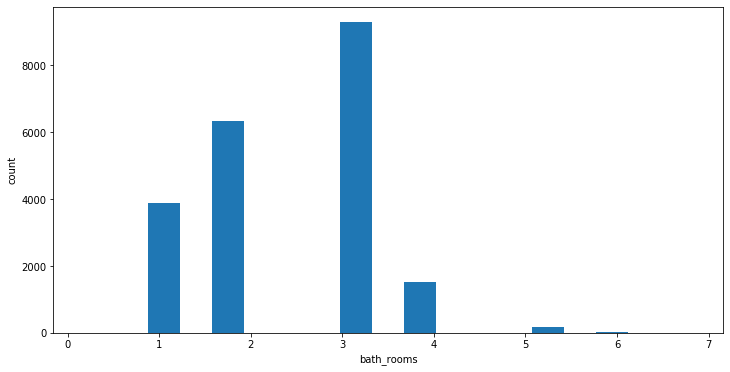

In [11]:
plt.rcParams['figure.figsize']=(12,6)
plt.hist(df.room_bath,rwidth=0.5)
plt.xlabel('bath_rooms')
plt.ylabel('count')

In [12]:
#as per above graph bathrooms more than 3 are less in mumber so removing those by considering those as autliers
df=df[df.room_bath <=3]

In [13]:
#houses with 0 bed room and 0 bath room is not possible. So, removing those unusual rows
df=df[df.room_bed !=0]
df=df[df.room_bath !=0]

#no of bath rooms more than number of bed rooms is quiet unusual. So considering those as outliers and removing
df=df[df.room_bath<df.room_bed+1]

In [15]:
#while handling with nullvalues int datapoints changed to float
#converting float to int
flt_columns=['room_bed', 'room_bath', 'ceil', 'coast', 'condition', 'quality', 'yr_built', 'furnished','total_area']
for columns in flt_columns:
    df[columns]=df[columns].apply(np.int64)

In [19]:
bedroom_dummies=pd.get_dummies(df.room_bed)

In [22]:
bedroom_dummies.columns=['1bed','2bed','3bed','4bed','5bed']

In [23]:
bedroom_dummies.head()

,1bed,2bed,3bed,4bed,5bed
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,1,0,0,0


In [24]:
df=pd.concat([df,bedroom_dummies],axis=1)

In [25]:
df.drop(['room_bed','5bed'],axis=1,inplace=True)

In [26]:
df.head()

,price,room_bath,ceil,coast,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,furnished,total_area,customized,1bed,2bed,3bed,4bed
0,600000,2,1,0,3,8,1800.0,1250.0,1966,0,98034,0,12490,1,0,0,0,1
1,190000,1,1,0,4,6,670.0,0.0,1948,0,98118,0,3771,1,0,1,0,0
2,735000,3,2,1,3,8,3040.0,0.0,1966,0,98118,0,5455,1,0,0,0,1
3,257000,3,2,0,3,8,1740.0,0.0,2009,0,98002,0,5461,1,0,0,1,0
4,450000,1,1,0,3,7,1120.0,0.0,1924,0,98118,0,5710,1,0,1,0,0


In [27]:
bathroom_dummies=pd.get_dummies(df.room_bath)
bathroom_dummies.columns=['1bath','2bath','3bath']
bathroom_dummies.head()

,1bath,2bath,3bath
0,0,1,0
1,1,0,0
2,0,0,1
3,0,0,1
4,1,0,0


In [28]:
df=pd.concat([df,bathroom_dummies],axis=1)
df.drop(['room_bath','3bath'],axis=1,inplace=True)
df.head()

,price,ceil,coast,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,furnished,total_area,customized,1bed,2bed,3bed,4bed,1bath,2bath
0,600000,1,0,3,8,1800.0,1250.0,1966,0,98034,0,12490,1,0,0,0,1,0,1
1,190000,1,0,4,6,670.0,0.0,1948,0,98118,0,3771,1,0,1,0,0,1,0
2,735000,2,1,3,8,3040.0,0.0,1966,0,98118,0,5455,1,0,0,0,1,0,0
3,257000,2,0,3,8,1740.0,0.0,2009,0,98002,0,5461,1,0,0,1,0,0,0
4,450000,1,0,3,7,1120.0,0.0,1924,0,98118,0,5710,1,0,1,0,0,1,0


In [29]:
df['ceil'].unique()

array([1, 2, 3, 4], dtype=int64)

In [30]:
ceil_dummies=pd.get_dummies(df.ceil)
ceil_dummies.columns=['1ceil','2ceil','3ceil','4ceil']
df=pd.concat([df,ceil_dummies],axis=1)
df.drop(['ceil','4ceil'],axis=1,inplace=True)
df.head()

,price,coast,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,furnished,...,customized,1bed,2bed,3bed,4bed,1bath,2bath,1ceil,2ceil,3ceil
0,600000,0,3,8,1800.0,1250.0,1966,0,98034,0,...,1,0,0,0,1,0,1,1,0,0
1,190000,0,4,6,670.0,0.0,1948,0,98118,0,...,1,0,1,0,0,1,0,1,0,0
2,735000,1,3,8,3040.0,0.0,1966,0,98118,0,...,1,0,0,0,1,0,0,0,1,0
3,257000,0,3,8,1740.0,0.0,2009,0,98002,0,...,1,0,0,1,0,0,0,0,1,0
4,450000,0,3,7,1120.0,0.0,1924,0,98118,0,...,1,0,1,0,0,1,0,1,0,0


In [31]:
df['condition'].unique()

array([3, 4, 5, 2, 1], dtype=int64)

In [33]:
con_dummies=pd.get_dummies(df.condition)
con_dummies.columns=['condition1','condition2','condition3','condition4','condition5']
df=pd.concat([df,con_dummies],axis=1)
df.drop(['condition','condition5'],axis=1,inplace=True)
df.head()

,price,coast,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,furnished,total_area,...,4bed,1bath,2bath,1ceil,2ceil,3ceil,condition1,condition2,condition3,condition4
0,600000,0,8,1800.0,1250.0,1966,0,98034,0,12490,...,1,0,1,1,0,0,0,0,1,0
1,190000,0,6,670.0,0.0,1948,0,98118,0,3771,...,0,1,0,1,0,0,0,0,0,1
2,735000,1,8,3040.0,0.0,1966,0,98118,0,5455,...,1,0,0,0,1,0,0,0,1,0
3,257000,0,8,1740.0,0.0,2009,0,98002,0,5461,...,0,0,0,0,1,0,0,0,1,0
4,450000,0,7,1120.0,0.0,1924,0,98118,0,5710,...,0,1,0,1,0,0,0,0,1,0


In [34]:
df['quality'].unique()

array([ 8,  6,  7,  9,  5, 10, 11,  4, 12,  3, 13], dtype=int64)

In [35]:
#Splitting dependent and independent values
X=df.drop(['price'], axis='columns')
y=df.price

In [36]:
#Splitting into train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

#building a MLR model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [37]:
model.score(X_test,y_test)

0.5916458831046176

In [38]:
#lets normalize the data and try
#normalizing the dataset for better score
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

normalized_arr=scaler.fit_transform(X)
norm_X=pd.DataFrame(normalized_arr, columns=X.columns)

In [39]:
from sklearn.model_selection import train_test_split
X_train_norm,X_test_norm,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

In [40]:
model.fit(X_train_norm,y_train)

LinearRegression()

In [41]:
model.score(X_test,y_test)

0.5916458831046176

In [42]:
df['zipcode'].unique()

array([98034, 98118, 98002, 98030, 98103, 98042, 98031, 98065, 98109,
       98058, 98001, 98105, 98115, 98032, 98033, 98199, 98056, 98102,
       98038, 98092, 98003, 98075, 98059, 98008, 98011, 98014, 98023,
       98053, 98116, 98198, 98126, 98108, 98133, 98074, 98106, 98045,
       98146, 98155, 98117, 98027, 98072, 98005, 98055, 98070, 98028,
       98166, 98077, 98019, 98136, 98107, 98040, 98004, 98125, 98052,
       98177, 98122, 98168, 98007, 98178, 98010, 98029, 98188, 98039,
       98144, 98112, 98022, 98148, 98006, 98119, 98024], dtype=int64)